# Decisio Tree - tergolong -
    - entropy, gini
    - nested if else

> overfitting ada 2 pendekatan
    - Pre-purning -> menghentikan tree lebih awal
    - Pre-purning -> mencoba lebih dalam

    - dokumentasi parameter regularisasi 
        -Maximum depth of tree (cek  akurasi dari beberapa parameter) [2,4,6] misalnya tergantung jumlah list untuk waktu pengerjaan


ke penerapan contoh di bawah ya


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics,tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.datasets import load_iris


In [6]:
# load dset
iris = load_iris()
iris.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
print (iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
x = iris.data
y = iris.target

df = pd.DataFrame(x, columns= iris.feature_names)
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [10]:
new_df = df.copy()
# di copy biar kalau di ubah ga ngaruh sm df lama
new_df['class']=y
# nambahin class di df

new_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


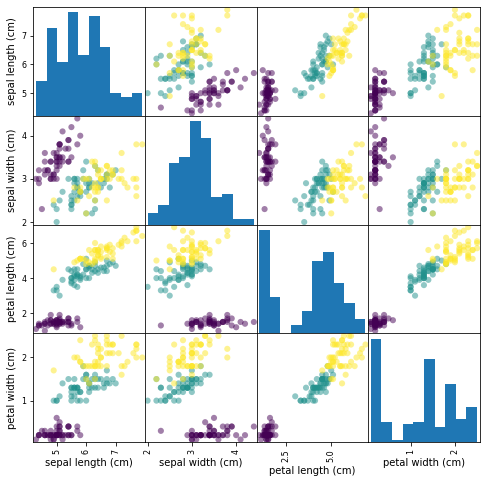

In [11]:
matrix_scatter = pd.plotting.scatter_matrix(df, c=y,figsize= (8,8), s=150) #y adalah target

yang berkorelasi petal lenght dan petal width dari gambar

- selain cek korelasi bisa juga pakai feature important

In [12]:
X= new_df.drop('class', axis=1)
y= new_df['class'] #target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2,random_state=1, stratify=y)# startify biar stabil

In [21]:
dt = DecisionTreeClassifier(max_depth=2, random_state=1) #maxdept adalah kedalaman data
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

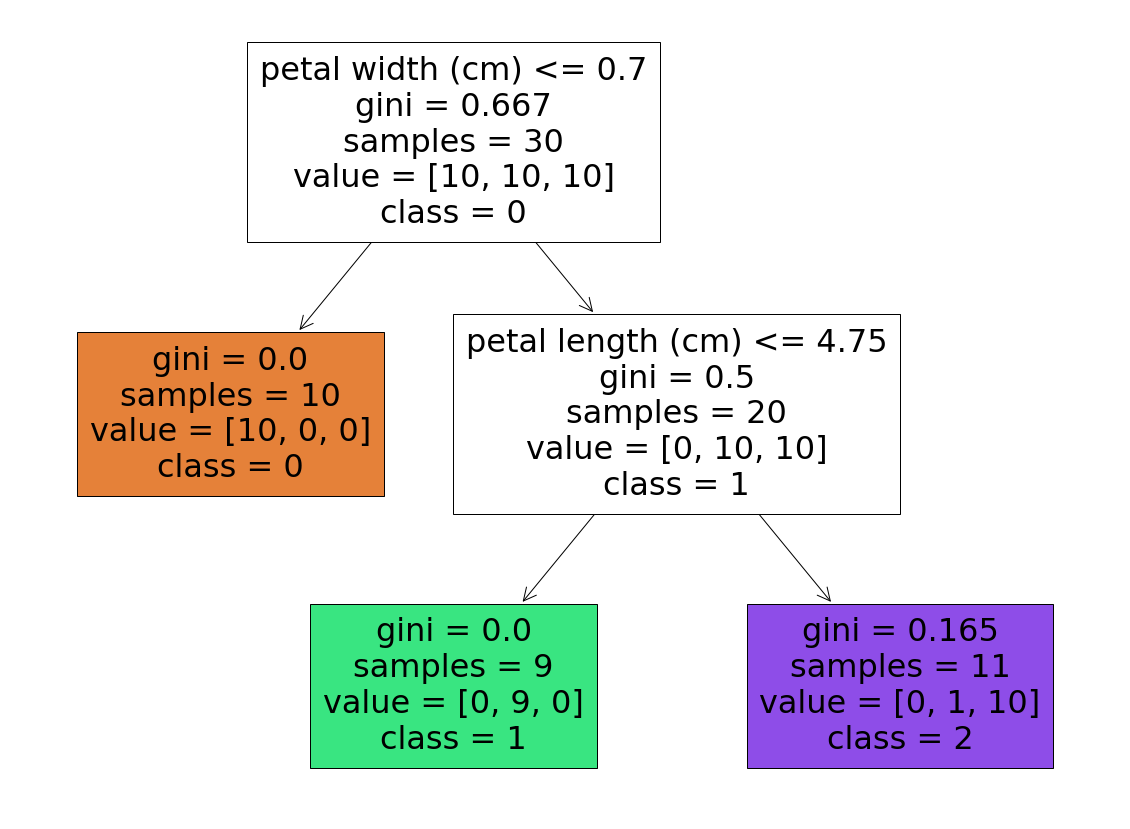

In [22]:
plt.figure(figsize=(20,15))
tree.plot_tree(dt, feature_names=X.columns, class_names=['0','1','2'],filled=True)
plt.show()

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
dt_pred_train = dt.predict(X_train)
print('DT\n', classification_report(y_train,dt_pred_train))

DT
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [25]:
cm = confusion_matrix(y_train,dt_pred_train)
print('DT\n',cm)

DT
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


In [33]:
dt_pred_val = dt.predict( X_test)
print('DT \n', classification_report(y_test, dt_pred_val))


DT 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.88      0.92        40
           2       0.89      0.97      0.93        40

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



In [35]:
print('train',dt.score(X_train, y_train))
print('test',dt.score(X_test, y_test))

train 0.9666666666666667
test 0.95


# Hyper parameter tunning

In [36]:
params ={
    'criterion' : ['gini', 'entropy'],
    'max_depth' : np.arange(2,9),
    'min_samples_leaf' : np.arange(1,5),
    'min_samples_split' : np.arange(2,6)
}


In [37]:
dt_grid = GridSearchCV(dt, params, cv=10, scoring='accuracy', return_train_score= True)
dt_grid.fit(X_train, y_train)


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8]),
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([2, 3, 4, 5])},
             return_train_score=True, scoring='accuracy')

In [38]:
print('best params: ', dt_grid.best_params_)


best params:  {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [39]:
dt_best = dt_grid.best_estimator_
print(dt_best)


DecisionTreeClassifier(max_depth=2, random_state=1)
